In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
bs = 8 # batch size

In [ ]:
!pip install -Uqq fastai fastbook nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.2/401.2 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


In [ ]:
from fastai import *
from fastbook import *
from fastai.vision.all import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/MasterCourse/Wildlife Identification In Urban Environments

/content/drive/My Drive/MasterCourse/Wildlife Identification In Urban Environments


In [ ]:
doc(search_images_ddg)

In [ ]:
Wildlife_labels = [
    "urban squirrel",
    "urban raccoon",
    "urban deer",
    "urban rabbit",
    "urban fox",
    "urban coyote ",
    "urban bird",
    "urban skunk",
    "urban opossum",
    "urban stray Cat",
    "urban pigeon",
    "urban rat",
    "urban bat",
    "urban hedgehog",
    "urban armadillo"

]
len(Wildlife_labels)

15

In [ ]:
images = search_images_ddg(Wildlife_labels[0])
f"No of Images => {len(images)} -- One Image URL => {images[0]}"

'No of Images => 200 -- One Image URL => https://www.woodlandtrust.org.uk/media/1290/grey-squirrel-close-up-alamy-dyddwa-don-hooper.jpg?center=0.39072847682119205'

In [ ]:
doc(download_url)

In [ ]:
dest = "urban rabbit.jpg"
download_url(images[0], dest, show_progress=False)

Path('urban rabbit.jpg')

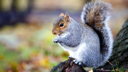

In [ ]:
image = Image.open(dest)
image.to_thumb(128, 128)

In [ ]:
data_path = "data"
if not os.path.exists(data_path):
  os.mkdir(data_path)

for wildlife_type in Wildlife_labels:

  dest = f"{data_path}/{wildlife_type}"
  if not os.path.exists(dest):
    os.mkdir(dest)

  try:
    wildlife_image_urls = search_images_ddg(wildlife_type)
    download_images(dest, urls = wildlife_image_urls)

  except:
    continue

In [ ]:
image_counts = get_image_files(data_path)
image_counts

(#5380) [Path('data/urban squirrel/e557d195-fbc7-4aa8-b852-724f420a8f95.jpg'),Path('data/urban squirrel/1846ac9a-95ce-4bfc-893f-1e8601541a82.jpeg'),Path('data/urban squirrel/692949a8-7c39-4773-a15f-f45e6f84a20e.jpg'),Path('data/urban squirrel/af5f7392-a467-4280-a844-5cd657b7aff9.JPG'),Path('data/urban squirrel/de285f1b-af71-49cf-a4fb-1e4afd4826c2.jpg'),Path('data/urban squirrel/065f8971-a053-4cb5-a434-1826db6a9383.jpg'),Path('data/urban squirrel/5904e34f-71d0-4253-8044-1a8b3f51188c.jpg'),Path('data/urban squirrel/527c2788-a04c-43c0-9364-68fd46a41f8a.jpg'),Path('data/urban squirrel/0ac94e4d-6a11-412a-acce-a60ceaf01110.jpg'),Path('data/urban squirrel/872f6c0e-e3a0-4748-ac7c-55fe798eda1a.jpg')...]

In [ ]:
failed = verify_images(image_counts)
failed

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:858: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 2. 
  warnings.warn(str(msg))


(#76) [Path('data/urban squirrel/d03fafce-0c9c-4060-adf3-7b592177d0d9.jpg'),Path('data/urban squirrel/fbc1f057-8ac1-4b41-8a45-59ebe539a7c4.jpg'),Path('data/urban raccoon/445b692d-ad77-4e67-9835-8c6a2ea7bfa4.jpg'),Path('data/urban raccoon/dd76682b-35d8-4262-a02f-3ac5a8fc8137.jpg'),Path('data/urban raccoon/b1c5e59b-834a-438b-9030-6d0393cf0988.jpg'),Path('data/urban raccoon/3721d917-b556-47f7-94ab-0cd00b6524d6.jpg'),Path('data/urban raccoon/3885fd0d-6fdf-4583-b697-0ca6fc204d98.jpg'),Path('data/urban deer/830d3947-d7a5-4d25-b425-8cf499723eff.jpg'),Path('data/urban deer/e0cf5703-4d87-4b71-a21f-5906d9f907da.jpg'),Path('data/urban deer/15e35ca6-e13f-46d9-a674-9a462e129e1f.jpg')...]

In [ ]:
failed.map(Path.unlink)

(#76) [None,None,None,None,None,None,None,None,None,None...]

In [ ]:
doc(get_image_files)

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,                        # get_image_files returns a list of all images in that path recursively by default
    splitter=RandomSplitter(valid_pct=0.1, seed=42),  # getting 90-10 train-validation split
    get_y=parent_label,                               # taking the folder name as labels
    item_tfms=Resize(128))                            # resizing to get the image of same shape

In [ ]:
dls = dblock.dataloaders(data_path,bs=bs)

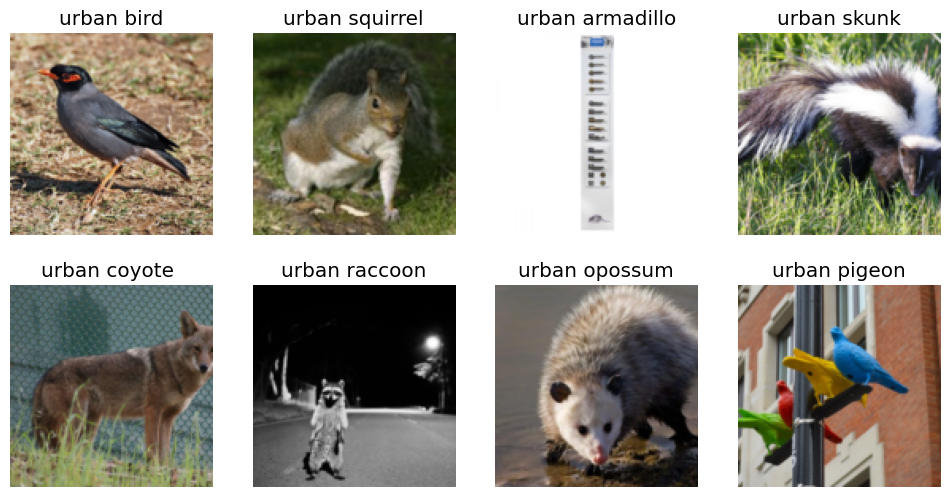

In [ ]:
dls.train.show_batch(max_n=8, nrows=2)

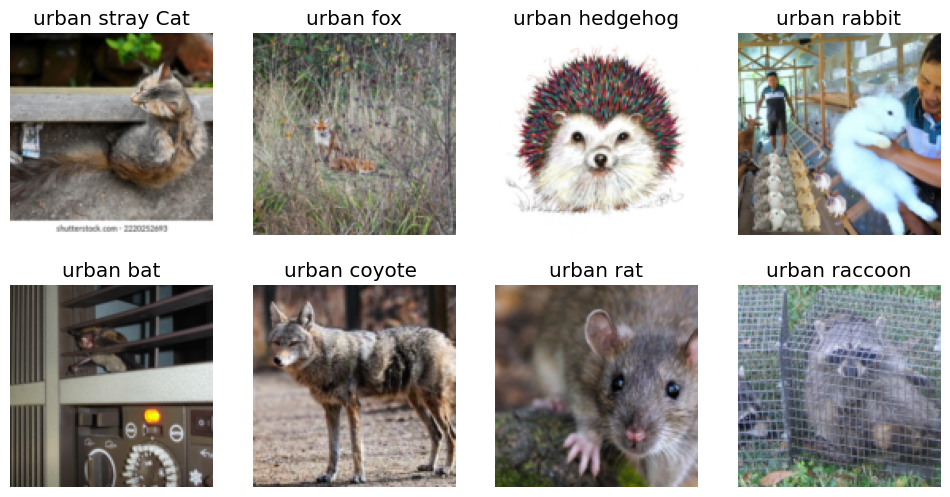

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

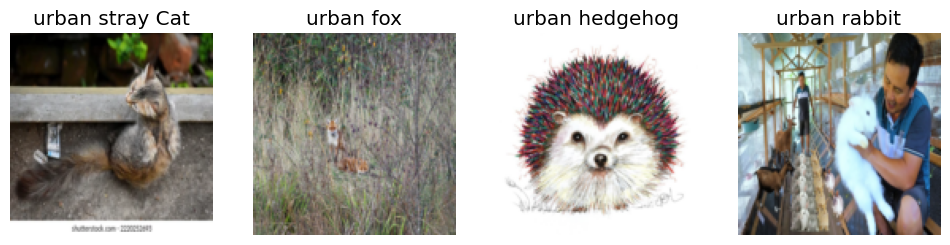

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Squish)) # Squishing the whole image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

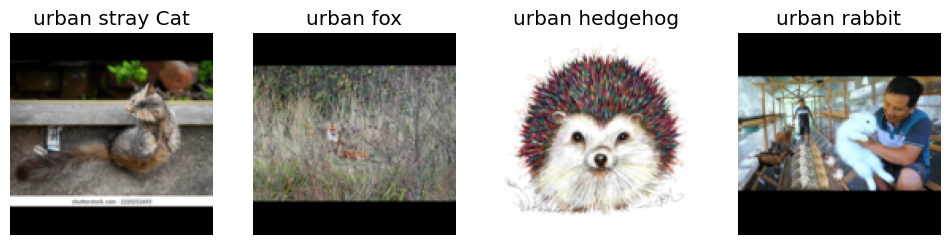

In [ ]:
dblock = dblock.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros')) # Padding the extra spaced the whole image into (128 x 128) size without squishing
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

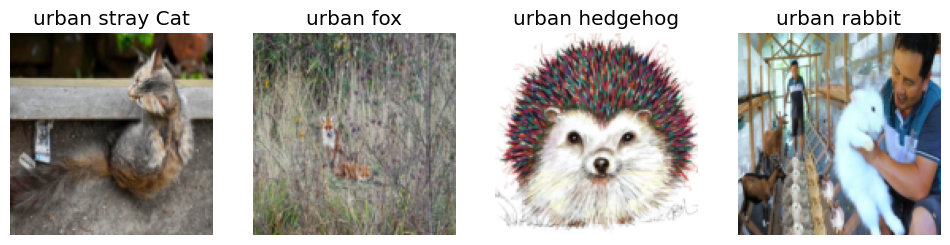

In [ ]:
dblock = dblock.new(item_tfms=RandomResizedCrop(128, min_scale=0.3)) # Randomly cropping, cutting, resizing, coloring parts of image into (128 x 128) size
dls = dblock.dataloaders(data_path)
dls.valid.show_batch(max_n=4, nrows=1)

In [ ]:
doc(aug_transforms)

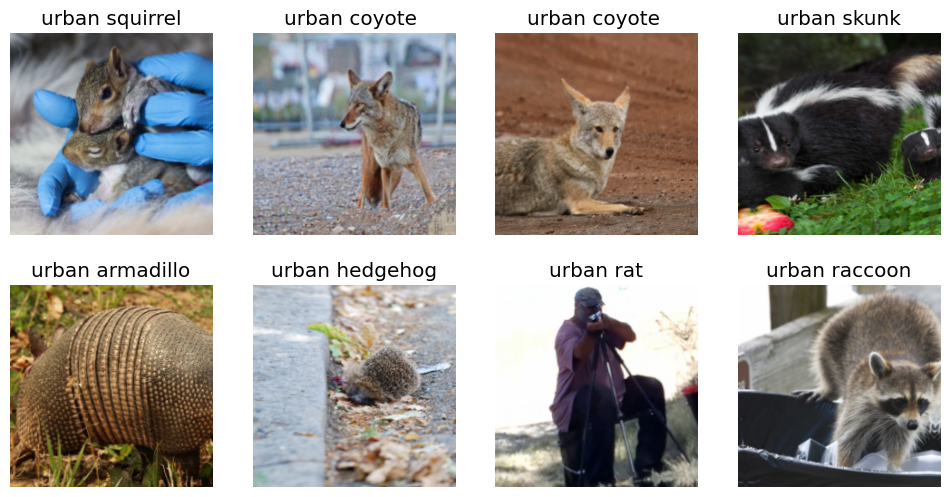

In [ ]:
# RandomResizedCrop crops images randomly and create copies so that we don't miss out anything
# aug_transforms is used for image data augmentation
dblock = dblock.new(item_tfms=RandomResizedCrop(224, min_scale=0.5), batch_tfms=aug_transforms())
dls = dblock.dataloaders(data_path)
dls.train.show_batch(max_n=8, nrows=2)

In [ ]:
torch.save(dls, "wildlife_dataloader_v0.pkl")